In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
from IPython.display import HTML
# import cv2 as cv
import matplotlib.image as mpimg

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource,FactorRange,Legend
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.transform import factor_cmap,dodge
from bokeh.palettes import Spectral4
import math
warnings.filterwarnings('ignore')

In [30]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
from IPython.display import IFrame

di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import folium
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource,FactorRange,Legend
from bokeh.palettes import Paired12
from bokeh.plotting import figure
from bokeh.transform import factor_cmap,dodge
import math
from bokeh.layouts import column, row, WidgetBox
from bokeh.models import Panel
from bokeh.models.widgets import Tabs
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider
from bokeh.models.widgets import Dropdown, Toggle
from bokeh.layouts import layout

# ***Are you interested in discovering regularity and features of 311-Service-Requests to provide crucial suggestions for different department of NYC? Are you curious about the influence of COVID-19 on people's lives in NYC? Come and follow us, we will help you gain an insight from different perspectives!***
***
# ***Overview of 311-Service-request dataset***
## *What is 311-Service-request? It is a complaint hotline of NewYork City, which includes lots of types of complaints all over NYC. We will focus on 311-service data after 2015.*
## **Statistics by department**

In [34]:
data = pd.read_csv("focus_types.csv")

In [35]:
data['Created Date'] = pd.to_datetime(data['Created Date'],format = '%Y-%m-%d %H:%M:%S')
data_st = data.sort_values(by = ['Created Date'])
data_pre = data_st.loc[data_st['Created Date'].dt.date >= datetime.date(2015,1,1),:]
data_pre = data_pre.loc[data_pre['Created Date'].dt.date < datetime.date(2019,1,1),:]
data_pre['Closed Date'] = pd.to_datetime(data_pre['Closed Date'],format = '%Y-%m-%d %H:%M:%S')

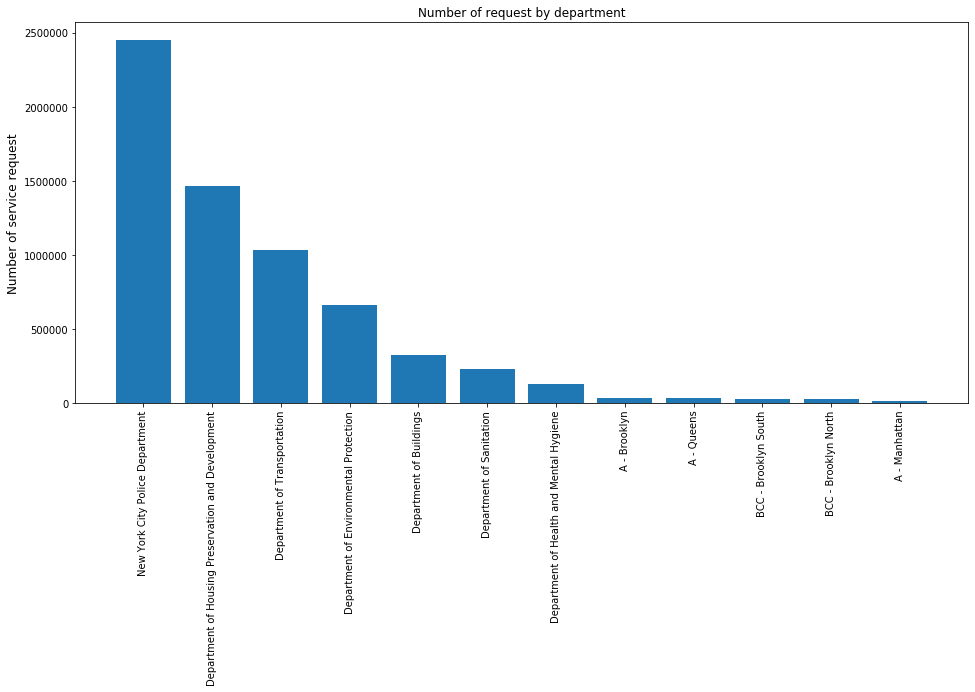

In [36]:
Agency_type = data_pre.loc[:, ['Agency Name']]
Agency_type_sum = Agency_type.groupby('Agency Name').size()
Agency_type_sum_order =  Agency_type_sum.sort_values(ascending=False)
AgencyNames = Agency_type_sum_order._stat_axis.values[0:12]
Agency_type_sum_order_value=Agency_type_sum_order.values[0:12]
plt.figure(figsize=(16,7))
plt.bar(AgencyNames,Agency_type_sum_order_value)
plt.xticks(rotation=90)
plt.ylabel('Number of service request',fontsize = 12)
plt.title('Number of request by department')
plt.show()

### *From this graph, we can see that police, housing, transportation and environmental protection received the most requests. It seems reasonable because it is closely relatied to people's daily life.*

## **Frequency distribution of different types of request on different department**

In [ ]:
# Agency_type = pd.crosstab(data_pre['Complaint Type'],data_pre['Agency Name'])
# for i in range(len(Agency_type.columns)):
#     num = Agency_type.loc[:,Agency_type.columns[i]].sum()
#     for j in range(len(Agency_type.index)):
#         Agency_type.iloc[j,i] = Agency_type.iloc[j,i]/num    
        
# Agency_type = Agency_type.loc[:,AgencyNames]
# Agency_type = Agency_type.reset_index()

In [51]:
# source = ColumnDataSource(Agency_type)
# color = Paired12
# c_type = data_pre.groupby(['Complaint Type']).count().index.values
# output_notebook(hide_banner=True)
# p = figure(x_range = FactorRange(factors=c_type),plot_width=1000,x_axis_label='Complaint type',y_axis_label='Relative Frequency')
# p.xaxis.major_label_orientation = math.pi/2

# bar ={}
# items = [] ### for the custom legend // you need to figure out where to add it
# for (indx,i),col in zip(enumerate(AgencyNames),color):
#    bar[i] = p.vbar(x=dodge('Complaint Type',0, range=p.x_range), top=i, source= source, width = 0.9,muted_alpha=0.01, muted=True,color=col, alpha = 0.6) 
#    items.append((i, [bar[i]]))
   
# legend = Legend(items= items , location=(0, -20),click_policy="mute",label_text_font_size="8pt" )
# p.add_layout(legend, 'right')
# output_file("departent.html")
# show(p)
HTML(filename = 'departent.html')

### *From this interactive graph, you are able to see which department is on duty for which certain complaint type. For example, you may discover that the New York City Police Department is responsible for all kinds of social noise related complaints, and Residential Noise is the most numerous which accounts for nearly 35% of total complaints received in New York City Police Department.*

In [38]:
focuscrimes = data_pre.groupby(['Complaint Type']).count().index.values
data_pre['DayOfWeek_s'] = data_pre['Created Date'].dt.weekday
data_pre['DayOfWeek_s'].replace([0, 1, 2, 3, 4, 5, 6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], inplace = True) 
data_pre['Hour_s'] = data_pre['Created Date'].dt.hour
data_pre['Month_s'] = data_pre['Created Date'].dt.month

In [ ]:
# # Computing hourly,weekly and monthly information
# hour_type = pd.crosstab(data_pre['Hour_s'],data_pre['Complaint Type'])
# for i in range(len(hour_type.columns)):
#     num = hour_type.loc[:,hour_type.columns[i]].sum()
#     for j in range(len(hour_type.index)):
#         hour_type.iloc[j,i] = hour_type.iloc[j,i]/num     
# hour_type = hour_type.loc[:,focuscrimes]
# hour_type = hour_type.reset_index()

# week_type = pd.crosstab(data_pre['DayOfWeek_s'],data_pre['Complaint Type'])
# for i in range(len(week_type.columns)):
#     num = week_type.loc[:,week_type.columns[i]].sum()
#     for j in range(len(week_type.index)):
#         week_type.iloc[j,i] = week_type.iloc[j,i]/num    
# week_type = week_type.loc[:,focuscrimes]
# week_type = week_type.reset_index()

# month_type = pd.crosstab(data_pre['Month_s'],data_pre['Complaint Type'])
# for i in range(len(month_type.columns)):
#     num = month_type.loc[:,month_type.columns[i]].sum()
#     for j in range(len(month_type.index)):
#         month_type.iloc[j,i] = month_type.iloc[j,i]/num    
        
# month_type = month_type.loc[:,focuscrimes]
# month_type = month_type.reset_index()

In [20]:
# source_hour = ColumnDataSource(hour_type)
# source_week = ColumnDataSource(week_type)
# source_month = ColumnDataSource(month_type)
# color = color = ['#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#2ca02c','#98df8a','#d62728','#ff9896','#9467bd','#c5b0d5','#e377c2','#f7b6d2','#17becf','#9edae5']
# output_notebook(hide_banner=True)
# ## making weekly tab interactive plot
# weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# p1 = figure(x_range = FactorRange(factors=weekdays),plot_width=950, plot_height = 400,x_axis_label='Weekday',y_axis_label='Relative Frequency')
# bar ={}
# items = [] ### for the custom legend // you need to figure out where to add it
# for (indx,i),col in zip(enumerate(focuscrimes),color):
#     bar[i] = p1.vbar(x=dodge('DayOfWeek_s',0, range=p1.x_range), top=i, source= source_week, width = 0.5,muted_alpha=0.005, muted=True,color=col,alpha=0.5) 
#     items.append((i, [bar[i]]))
# legend = Legend(items= items , location=(0, -20),click_policy="mute",label_text_font_size="8pt" )
# p1.add_layout(legend, 'right')
# tab1 = Panel(child=p1, title="Weekly")


# ## making hourly tab interactive plot
# hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
# p2 = figure(x_range = FactorRange(factors=hours), plot_width=950, plot_height = 400, x_axis_label='Hour',y_axis_label='Relative Frequency')

# bar ={}
# items = [] ### for the custom legend // you need to figure out where to add it
# for (indx,i),col in zip(enumerate(focuscrimes),color):
#     bar[i] = p2.vbar(x=dodge('Hour_s',0.5, range=p2.x_range), top=i, source= source_hour, width = 0.5,muted_alpha=0.005, muted=True,color=col,alpha=0.5) 
#     items.append((i, [bar[i]]))
# legend = Legend(items= items , location=(0, -20),click_policy="mute",label_text_font_size="8pt" )
# p2.add_layout(legend, 'right')
# tab2 = Panel(child=p2, title="Hourly")

# ## making monthly tab interactive plot
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
# p3 = figure(x_range = FactorRange(factors=months),plot_width=950, plot_height = 400,x_axis_label='Month',y_axis_label='Relative Frequency')
# bar ={}
# items = [] ### for the custom legend // you need to figure out where to add it
# for (indx,i),col in zip(enumerate(focuscrimes),color):
#     bar[i] = p3.vbar(x=dodge('Month_s',-0.5, range=p3.x_range), top=i, source= source_month, width = 0.5,muted_alpha=0.005, muted=True,color=col,alpha=0.5) 
#     items.append((i, [bar[i]]))
# legend = Legend(items= items , location=(0, -20),click_policy="mute",label_text_font_size="8pt" )
# p3.add_layout(legend, 'right')
# tab3 = Panel(child=p3, title="Monthly")

## **Frequency distribution of different time on different types of complaint request**

In [50]:
# tabs = Tabs(tabs=[tab2, tab1, tab3])
# output_file('hour-week-month.html')
# show(tabs)
HTML(filename = 'hour-week-month.html')

### **The interactive graph above shows the distribution of different complaint types in three different time patterns.** 
### **About hourly pattern:** *An interesting phenomenon is that almost all the complaint types are created in the morning time like from 8:00 to 19:00, however, the social noise complaints show the opposite trend that they always happen between 19:00 to 2:00 in the second day.*
### **About weekly pattern:** *Some of the complaint types such as "Building/Use", "Derelict", "Dirty Conditions", "Plumbing" and "Paint" show that they are always happened on weekdays instead of weekends. By contrast, the frequencies of those social noise complaints are much higher on weekends.*
### **About monthly pattern:** *The "Heat/hot water" shows a special trend that in winter from November to March, the frequency of this complaint type is extremly high, however, in summer only few of this complaint. Besides, the different trend can be seen for the noises related to vehicle and street, which show higher frequencies in summer.*

## **Respond time of different types of complaint request**

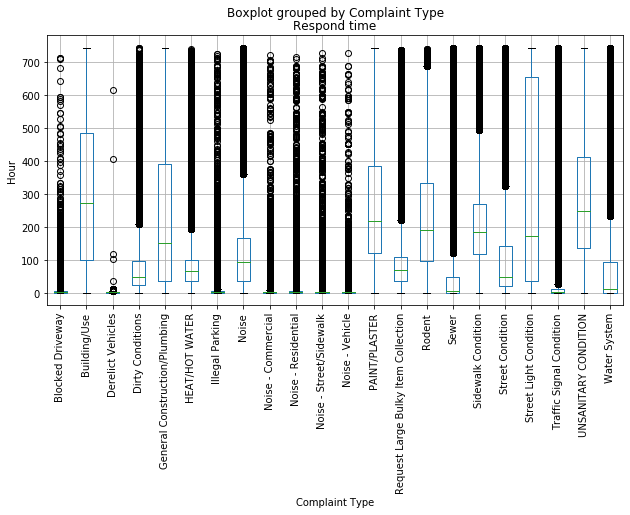

In [9]:
data_pre['Respond time'] = data_pre['Closed Date'] - data_pre['Created Date']
day = pd.DatetimeIndex(data_pre['Respond time'].values).day
hour = pd.DatetimeIndex(data_pre['Respond time'].values).hour
minute = pd.DatetimeIndex(data_pre['Respond time'].values).minute
second = pd.DatetimeIndex(data_pre['Respond time'].values).second
time = (day - 1)*24+hour+minute/60+second/3600
data_pre['Respond time'] = time
valid_resptime = data_pre.loc[data_pre['Respond time'] > 0]
valid_resptime.index = valid_resptime['Complaint Type']
valid_resptime_foc = valid_resptime.loc[focuscrimes,:]
focusdata_rt = valid_resptime_foc.loc[:,['Complaint Type', 'Respond time']]
focusdata_rt = focusdata_rt.reset_index(drop=True)
focusdata_rt.boxplot("Respond time", by="Complaint Type",figsize = (10,5), rot=90, fontsize=10)
plt.ylabel('Hour')
plt.show()

###  *Some of the complaints show that their respond time are 0, which means that maybe the department reject the request or the requst is invalid. Here we only consider those respond time larger than 0 and from the boxplot it can be seen that for those social noise, "Blocked Driveway", "Illegal parking", "Derelict Vehicles" and "Traffic Signal Condition", the related department will respond soon in hours. However for the complaints like "Building/Use", "Paint/Plaster" and "Unsanitary condition", the average respond time of these complaints are larger than 200 hours.*

## **The distribution of "Noise - Residential" in the map**

In [49]:
IFrame(src="Residential_noise_map.html", width=950, height=600)

###  *Here we can see how the request distributes in a different location. It can be seen that the Noise - Residential happened in the city centre. For those places which are in the suburbs of NYC, this type of complaint request is significantly less.*

## **KNN to classify the type of complaint request**

In [48]:
IFrame(src="kneighbors2v10.html", width=950, height=600)

###  *We here implement the KNN (k=10) to do the classification of the three different types of request, they are the Noise - Residential (green), Blocked Driveway (red) and Unsanitary Condition (blue). It can be seen that in the northeast of NYC the Blocked Driveway is not the main request type. Also for the place around Brooklyn, the Noise - Residential and Unsanitary Condition  seem to be more than Blocked Driveway.*

***
***
# **Now, let's explore more spatial and temporal features of 311 request and use it to reflect the influence of pandemic on people's lives.**

## ***First of all, an overview of COVID-19 situation of New York City***

### **Daily counts of cases, hospitalized and death**

In [42]:
#df_case = pd.read_csv('coronavirus-data-master/case-death.csv')
#output_notebook(hide_banner=True)
#daterange = (df_case['DATE_OF_INTEREST'])
#color = ['#1f77b4','#aec7e8','#ff7f0e']
#source = ColumnDataSource(df_case)
#p = figure(x_range = FactorRange(factors=daterange),title="Cases of Covid-19",
#           plot_width=1400, plot_height = 600, y_range=(0, 6500), x_axis_label='Date',y_axis_label='Cases')
#bar ={}
#items = []
#for (indx,i),col in zip(enumerate(df_case.iloc[:,1:]),Spectral4[1:]):
#    bar[i] = p.vbar(x= 'DATE_OF_INTEREST', top=i, source= source, width = 0.9,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
#    
#    items.append((i, [bar[i]]))
#legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size="12pt" )
#p.add_layout(legend, 'right')
##output_file("interactive_legend.html", title="interactive_legend.py example")
#
##p.xaxis[0].ticker.desired_num_ticks = 10
#p.xaxis.major_label_orientation = math.pi/4
#output_file('daily cases.html')
#show(p)
HTML(filename = 'daily cases.html')

FileNotFoundError: [Errno 2] No such file or directory: 'daily cases.html'

### *From the visualization above, we can see a trend of ascending initially and then descending. However, the descending period is not reliable, since the official website of NYC has declared that data needs correction, sepecially recent data, which makes recent data trustless.*

### **Rates by Age**

In [15]:
#df_age = pd.read_csv('coronavirus-data-master/by-age.csv')
#output_notebook(hide_banner=True)
#source = ColumnDataSource(df_age)
#p = figure(x_range = FactorRange(factors = df_age['AGE_GROUP']),title="Rates by Age ",
#           plot_width=950, plot_height = 500, y_range = (0, 4100), x_axis_label='Age Group', y_axis_label= 'Rate per 100,000 people')
#bar ={}
#items = []
#for (indx,i),col in zip(enumerate(df_age.iloc[:,1:]),Spectral4[1:]):
#    bar[i] = p.vbar(x= 'AGE_GROUP', top=i, source= source, width = 0.65,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
#    
#    items.append((i, [bar[i]]))
#legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '9pt')#"8pt"
#p.add_layout(legend, 'right')
#output_file('rate by age.html')
#show(p)
HTML(filename = 'rate by age.html')

### *This plot explicitly illustrates the risks people of different age group suffers. As we can see, old people over 65 years old are high risk groups, and the risk increases correspindingly with the increase of age. Teenagers and children under 17 years old are less susceptible to the infection of COVID-19.*

### **Rates by Sex**

In [16]:
#df_sex = pd.read_csv('coronavirus-data-master/by-sex.csv')
#output_notebook(hide_banner=True)
#source = ColumnDataSource(df_sex)
#p = figure(x_range = FactorRange(factors = df_sex['SEX_GROUP']),title="Rates by Sex ",
#           plot_width=950, plot_height = 450, y_range = (0, 4100), x_axis_label='Sex', y_axis_label= 'Rate per 100,000 people')
#bar ={}
#items = []
#for (indx,i),col in zip(enumerate(df_sex.iloc[:,1:]),Spectral4[1:]):
#    bar[i] = p.vbar(x= 'SEX_GROUP', top=i, source= source, width = 0.4,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
#    
#    items.append((i, [bar[i]]))
#legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '8pt')#"8pt"
#p.add_layout(legend, 'right')
#output_file('rate by sex.html')
#show(p)
HTML(filename = 'rate by sex.html')

### *According to the plot, males' case rate, hospitalized rate and death rate are slightly higher than females'.*

### **Counts and Rates by Borough**

In [17]:
#df_borough = pd.read_csv('coronavirus-data-master/boro.csv')
#df_borough['COVID_CASE_RATE'] = df_borough['COVID_CASE_RATE']*10
#df_borough = df_borough.iloc[:-1,:]
#output_notebook(hide_banner=True)
#color = ['#1f77b4','#aec7e8','#ff7f0e']
#source = ColumnDataSource(df_borough)
#p = figure(x_range = FactorRange(factors = df_borough['BOROUGH_GROUP']),title="Borough Statistics",
#           plot_width=900, plot_height = 450, y_range = (0, 65000), x_axis_label='Borough', y_axis_label= 'Counts & Rates');
#bar ={}
#items = []
#for (indx,i),col in zip(enumerate(df_borough.iloc[:,1:]),color[1:]):#[Spectral4[2], Spectral4[0]]
#    bar[i] = p.vbar(x= 'BOROUGH_GROUP', top=i, source= source, width = 0.4,muted_alpha=0.6, muted=True,color=col, fill_alpha = 0.6) 
#    
#    items.append((i, [bar[i]]))
#legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '9pt')#"8pt"
#p.add_layout(legend, 'right')
#output_file('rate by borough.html')
#show(p)
HTML(filename = 'rate by borough.html')

### *The unit of 'COVID_CASE_RATE'  is  'rate per 1,000,000 people'. What's worth mentioning is that although Stanten Island have the least case amount, its case rate is quite high. Probably because it's a relatively small borough and the population density is high, which makes the virus spread easier.*

***
## ***Annual time feature of 311 service request***
### **The focused complaint are the most common types of 311 service request, and their annual time characteristics are shown in the interactive plot below. Start playing around with it and try to find some interesting and valuable information!**
#### **(Click the buttons above to select types, and click the legend label to show/hide the plot of a certain year)**
#### Please note that the time range of each type is from May 1st of one year to April 30th of the next year, which enable the plot of '2019-2020' cover the intergrated time range of the explosion of COVID-19.

### **We are here to provide some perspective of a good exploration**
#### *1. General annual trend of a certain type*
#### *2. Parallel comparision of different years of a certain type*
#### *3. Please pay special attention to 2019 — 2020, is there any abnormal trend comparing with that of the other years?*
#### 

In [18]:
HTML(filename="overview.html")

##### 
## **Did you manage to find anything interesting? Let's see if we have got the same valuable information!**


### **1. Let's start from 'Rodent'.**

In [19]:
HTML(filename="Rodent.html")

#### 1.1  According to the figure above, 311 service got the most complaint of rodent in summer. After September, it gradually decreases and then reach the bottom in December, after which it rises again. This is consistent with people's common sense that rodents are active in summer and inert in winter.
#### 1.2  Besides the general annual trend, there's also an abnormal descent began from early March 2020, which was exactly the time when the outbreak of COVID-19 began in NYC. What caused this descend? Probably people are paying more attention to sanitary conditions due to COVID-19, which limits the growth of rodents.
### **2. To verify that the sanitary conditions are better in the spring of 2020 than that of years before, let take a look at 'Dirty condition' as well**

In [20]:
HTML(filename="DIRTY CONDITION.html")

#### The case amount of 'dirty condition' begin from early March 2020 were also descending, which is pretty much like that of 'rodents', while the case counts of other years were gradually increasing from march. This consolidates our conjecture that the sanitary condition are better in 2020 than that of other years, which probably confines the breed of rodents.

### **3. Now let's focus on 'Noise' complaints, including commercial, residential and street noises.**

In [21]:
HTML(filename="all_noises.html")

#### 3.1 About Street/Sidewalk Noises:  The complaint amount in winter is significantly less than that of summer, which makes sense because people are less likely to walk on the street in cold winter.
#### 3.2 About Commercial/Residential Noises:  There's no apparent annual trend such as increase of decrease. However, there are anomalies since early March, 2020. The complaint about residential noises increased significantly, while the complaint about commercial residential noises decreased, which reflects that people were inclined to stay at home rather than go to public commercial places after the breakout of COVID-19.

### **5. About tranportation: 'Blocked Driveway' complaints**

In [22]:
HTML(filename="Blocked Driveway.html")

#### 5.1 There's no apparent annual trend such as increase of decrease, which means that seasons don't have great influence on people's travel frequency and methods.
#### 5.2 Again, there's an anomaly in the complaint amount of 'blocked driveways' since early March, 2020, which reflects from another perspective that people were inclined to stay at home rather than go to public commercial places after the breakout of COVID-19.

### **6. What happened in NYC since July, 2019?**
#### **Let's first take a look at the type 'unsanitary condition'**

In [23]:
HTML(filename = 'UNSANITARY CONDITION.html')

#### **There's an apparent anomalous drop in July 2019, comparing with data of other years. What actually caused this drop?**

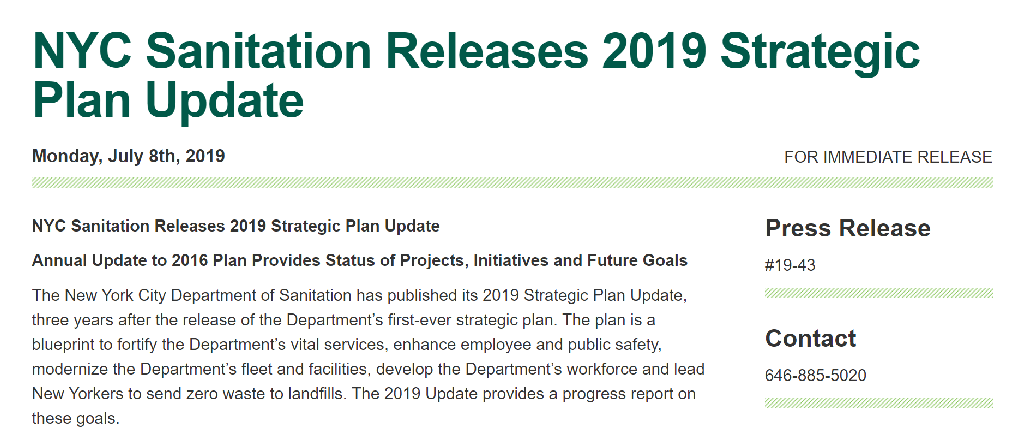

In [24]:
import matplotlib.image as mpimg
screenshot = mpimg.imread('NYC_sanitary_screenshot.png')
fig = plt.figure(figsize=(18, 25))  
plt.xticks([]) 
plt.yticks([])
plt.axis('off')
plt.imshow(screenshot);

##### Source: https://www1.nyc.gov/assets/dsny/site/resources/press-releases/nyc-sanitation-releases-2019-strategic-plan-update
#### **According to the official website of NYC, NYC Sanitation released 2019 Strategic Plan in July 2019, which includes different kind of measures to improve the hygiene of NYC. This can be a possible explanation to the steep drop of 'unsanitary condition' complaint amount. If it truly is the reason, then we must say that the efficiency of NYC Sanitation's actions is amazing and impressive.**

***
# 
## **In order to provide a deeper insight of the influence of COVID-19, we dig into temporal-spatial regularity exploration using heatmap of different time scales.** 
### Heatmap moives are plotted daily, weekly and monthly for four typical complaint types: **'Rodent', 'Noise - Commercial','Noise - Residential' and 'Blocked Driveway.** We choose two period before (April to September in 2019) and after(November 2019 to April 2020) the outbreak of COVID-19.


### **Let's start with the daily spatial-temporal patterns before the pandemic.**
#### (Please note that you can select the type of service request at the top rightcorner of the figure)

### (1) Daily heatmap before the outbreak of COVID-19

In [25]:
IFrame(src='hours_beforeCovid0.html', width=950, height=600)
#HTML(filename = 'hours_beforeCovid0.html')

### **From the heatmap, we can see that...**
### (1)The number of **'Rodent'** is relatively lower from **2 to 5am**. It happens frequenly during the day from 11 to 15. And what about spatial patterns?
### (2)Complaints **residence and commercial noise** happen frequenly after 22 pm in the evening, but less during the day. The residence complaint incidents occur in the whole area, whereas the commercial complaints mainly happen in **Manhattan and Brooklyn.** The reason might be that there are more commercial areas in these districts.
### (3)The traffic problems occurs during rush hour like from 18 to 20，in most area except Manhattan. This may be due to higher housing costs.

# 
### **Now let's take a look at daily heatmap movie after the burst of COVID-19. You may find some interesting changes on spatiotemporal pattern during the pandemic!**

In [26]:
IFrame(src='hours_afterCovid0.html', width=950, height=600)

### **You may find that...**
### The **'Rodent'** case amount decreases apparently from 11 to 15, especially in Brookly and Queens.
### There is an decrease in the case amount of **'Noise - Commercial'**, especiall in Brookly, whereas the amount of case **'residence nosie'** increase slightly in the whole area.

# 
### **Then let's take a look at the monthly spatiotemporal patterns before the outbreak of pandemic**

In [27]:
IFrame(src='month_beforeCovid0.html', width=950, height=600)

### It seems all the complaint types remain constant during the period from April to September in 2019.
# 
### **Then let's compare the heatmap above with the monthly spatiotemporal patterns after the outbreak of the pandemic**

In [28]:
IFrame(src='months_afterCovid0.html', width=950, height=600)

### **Here's what we've found...**
### The period after January 2020 sees a significant decrease in the number of case **'Rodent'** in most areas except Manhattan. 
### The amount of residence nosie complaint increases slightly after May, whereas the commercial noise and Blocked Drivway decreas significantly after April in Brookly. This may be the result of Coronavirus Shutdown. More and more people stay at home.  

# 
### **Additionally, the weekly spatiotemporal patterns is shown to explore more details.**

+ __Weekly heatmap movie before the outbreak of COVID-19__

In [29]:
IFrame(src='weeks_beforeCovid0.html', width=950, height=600)

+ __Weekly heatmap movie after the outbreak of COVID-19__

In [30]:
IFrame(src='weeks_afterCovid0.html', width=950, height=600)

## **Did you manage to find any interesting patterns during weekdays and weekends for different types correlated to pandemic?**
***
***
## ***We do hope that our work provide a great interpretation about pattern and features of 311-service-request and its correlation with COVID-19 in NYC. We tried different methods of visualization, and it would be our honor if some of them were helpful to gain a better understanding and truly catched your eyes!***